<a href="https://colab.research.google.com/github/ShubhamJadhav03/21-days-pytorch/blob/main/Standard_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib as plt

In [ ]:
torch.__version__

'2.9.0+cu126'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Split data into training and test sets

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

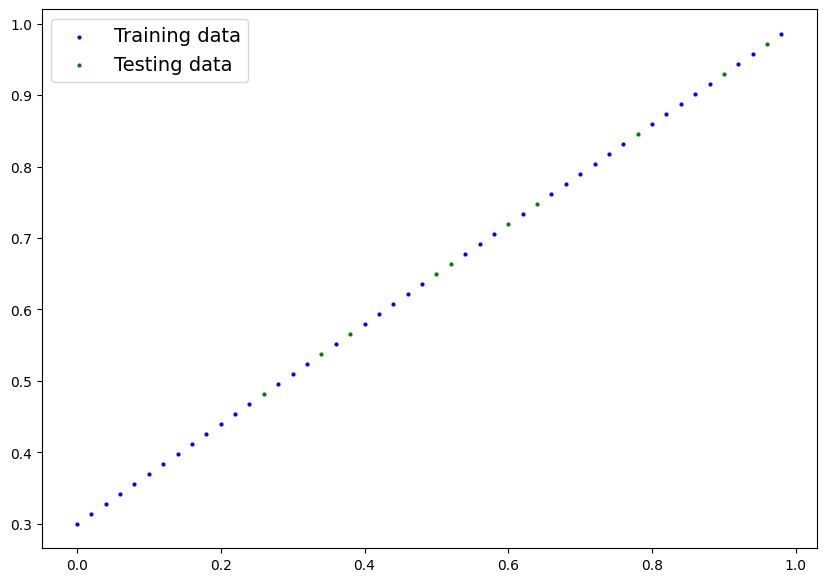

In [ ]:
plot_predictions();

Build Model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

 state (what the model contains) of the model using .state_dict().

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#Making predictions using torch.inference_mode()

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])

In [ ]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])


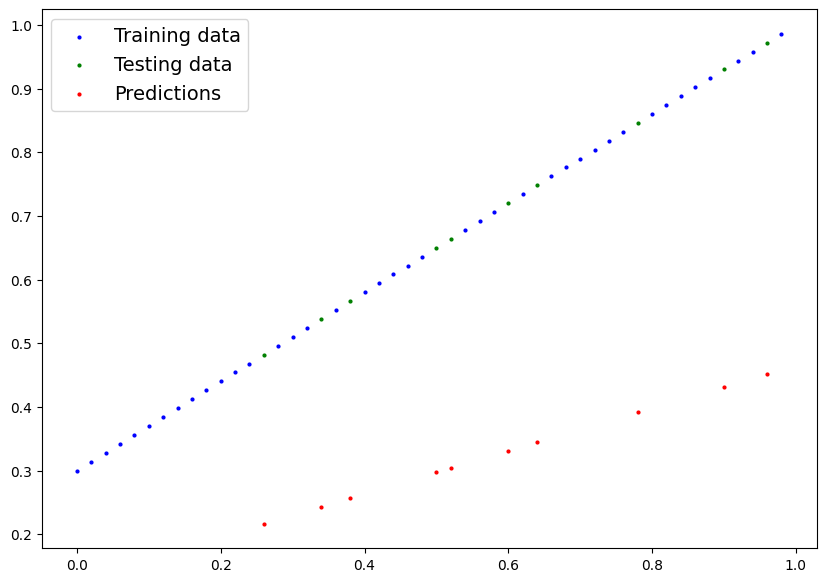

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.2657],
        [0.4546],
        [0.3892],
        [0.4982],
        [0.2947],
        [0.5200],
        [0.3601],
        [0.3528],
        [0.4037],
        [0.3092]])

Ok there is a huge difference between predicted and actual values

Why is this so?

This is generally because we havent trained our model yet which means that weight and bias are actually random right now.


#Train model

 we have set Parameters for our model randomly. Because of this reason we cant really make actual predictions.

OK so to solve this problem we have to train our model. So, what I mean by training our model is finding optimal weight and bias.


How to make this happen is the real question --> To make this possible we have to create a loss function and optimizer.

The main use of this loss function is to calculate how much there is difference between actual and prediccted values. And then based on this loss(difference) calculated we can then use a optimizer to update weights.

In [ ]:
#Based on our problem we have to make a numerical prediction so the best option for us would be using MAE to calculate Loss.

#And for Optimizer we would specifically use SGD, torch.optim.SGD(params, lr).

#params -> (weight, bias)


loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01)

#Creating an optimization loop in PyTorch


In [ ]:
#Now since our loss function and optimizer is now finalise its now time to create an optimization loop.

In [ ]:
model_0

LinearRegressionModel()

In [ ]:
torch.manual_seed(42)
epochs = 120

train_loss_values = []
test_loss_values = []
epoch_count = []
# for model optimisation
for epoch in range(epochs):
  model_0.train() #set model in train mode

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval() #setup model in eval mode
#for info
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epochs: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")



Epochs: 0 | MAE Train Loss: 0.340311199426651 | MAE Test Loss: 0.3720795214176178
Epochs: 10 | MAE Train Loss: 0.21864214539527893 | MAE Test Loss: 0.24470801651477814
Epochs: 20 | MAE Train Loss: 0.10375527292490005 | MAE Test Loss: 0.12293665111064911
Epochs: 30 | MAE Train Loss: 0.06399796903133392 | MAE Test Loss: 0.06073009967803955
Epochs: 40 | MAE Train Loss: 0.05161098390817642 | MAE Test Loss: 0.04132990166544914
Epochs: 50 | MAE Train Loss: 0.04540504142642021 | MAE Test Loss: 0.03398849442601204
Epochs: 60 | MAE Train Loss: 0.03980403393507004 | MAE Test Loss: 0.029580067843198776
Epochs: 70 | MAE Train Loss: 0.034203048795461655 | MAE Test Loss: 0.02517164871096611
Epochs: 80 | MAE Train Loss: 0.028602052479982376 | MAE Test Loss: 0.020763223990797997
Epochs: 90 | MAE Train Loss: 0.02300105430185795 | MAE Test Loss: 0.016354799270629883
Epochs: 100 | MAE Train Loss: 0.01740005984902382 | MAE Test Loss: 0.012063920497894287
Epochs: 110 | MAE Train Loss: 0.011799067258834839 

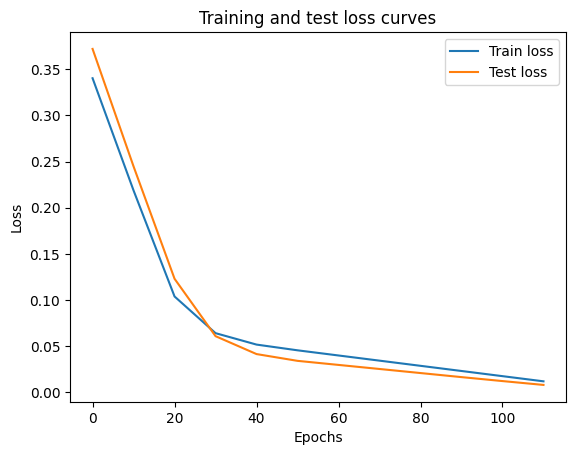

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6768]), 'bias': tensor([0.3123])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


#4. Making predictions with a trained PyTorch model (inference)

In [ ]:
# set model in eval
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.4883],
        [0.8402],
        [0.7184],
        [0.9214],
        [0.5424],
        [0.9620],
        [0.6642],
        [0.6507],
        [0.7454],
        [0.5695]])

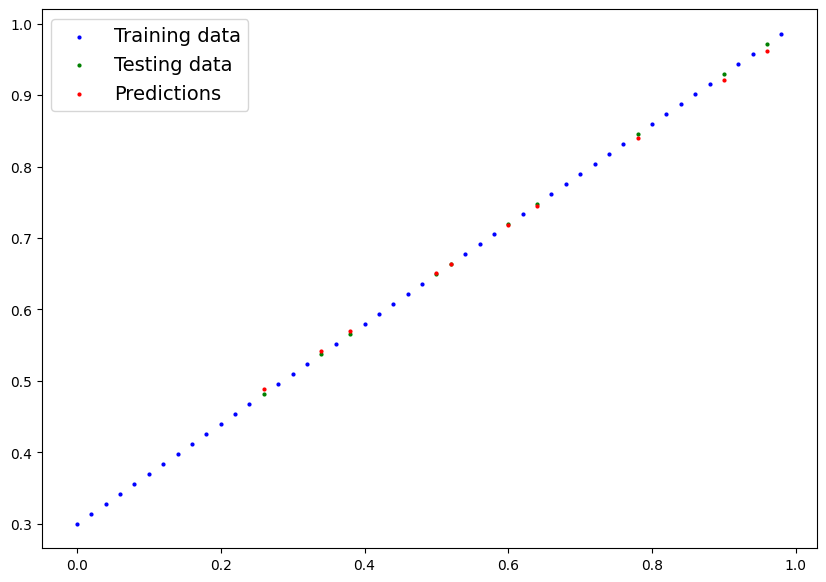

In [ ]:
plot_predictions(predictions=y_preds)

#5. Saving and loading a PyTorch model

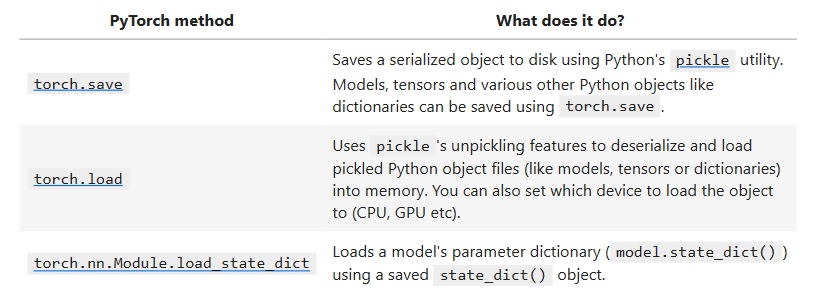